In [1]:
%matplotlib inline

In [2]:
! nvidia-smi


Fri Jan 13 18:03:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# import keras and other necessary modules for machine learning
from tensorflow import keras 
from tensorflow.keras import layers

# import these for handling data downloads and file and path manipulations
import os, shutil, pathlib

Importing data from Google drive

In [4]:
# Mount your google drive, which contains the data

from google.colab import drive
drive.mount('/content/drive')

my_directory = 'Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small'

train_cats_dir = '/content/drive/MyDrive/' + my_directory + '/train/cats'
train_dogs_dir = '/content/drive/MyDrive/' + my_directory + '/train/dogs'
validation_cats_dir = '/content/drive/MyDrive/' + my_directory + '/validation/cats'
validation_dogs_dir = '/content/drive/MyDrive/' + my_directory + '/validation/dogs'
test_cats_dir = '/content/drive/MyDrive/' + my_directory + '/test/cats'
test_dogs_dir = '/content/drive/MyDrive/' + my_directory + '/test/dogs'


# sanity check to see that all the files have loaded correctly 
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

Mounted at /content/drive
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [5]:
!ls       #list loaded drives

drive  sample_data


In [6]:
!pwd       #prints the current working directory

/content


In [7]:
!ls /content/drive/MyDrive/'Colab Notebooks'/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/   #lists folder contents

saved_models  test  train  validation


In [8]:
print(my_directory)

Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small


In [9]:
full_directory_name = '/content/drive/MyDrive/' + my_directory

In [10]:
print(full_directory_name)

/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small


In [11]:
# Copy data folder from Google drive to session storage
#!cp -r $full_directory_name /content/
!cp -rv /content/drive/MyDrive/Colab\ Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/ /content/

'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/' -> '/content/dogs-vs-cats_small'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/train' -> '/content/dogs-vs-cats_small/train'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/train/cats' -> '/content/dogs-vs-cats_small/train/cats'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/train/cats/cat.114.jpg' -> '/content/dogs-vs-cats_small/train/cats/cat.114.jpg'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/train/cats/cat.348.jpg' -> '/content/dogs-vs-cats_small/train/cats/cat.348.jpg'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/train/cats/cat.120.jpg' -> '/content/dogs-vs-cats_small/train/cats/cat.120.jpg'
'/content/drive/MyDrive/Colab Notebooks/IM931-2023/dogs-vs-cats_small/dogs-vs-cats_small/

Creating folders and uploading data to session storage

# Building our network

This network has several ```layers.Conv2D``` and ```layers.MaxPooling2D``` stages.

This serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 180x180 (a somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the Flatten layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 256), while the size of the feature maps is decreasing (from 180 ×180 to 7 × 7). This is a pattern that you will see in almost all convnets.

Because  we’re  looking  at a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

Also, we will start the model with a Rescaling layer, which will rescale image inputs (whose values are originally in the [0, 255] range) to the [0, 1] range.

In [12]:
inputs = keras.Input(shape=(180, 180, 3))  
x = layers.Rescaling(1./255)(inputs)      
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [13]:
# Show the  dimensions of the feature maps at every successive layer
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [14]:
# Compilation Step: configuring the model for training
# define the optimiser, loss function and metrics to monitor during training and testing

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Data preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Resize them to a shared size (we’ll use 180 × 180)
* Pack them into batches (we’ll use batches of 32 images).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. In  particular,  Keras  features  the  utility  function  `image_dataset_from_directory()`, which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors. 
Calling `image_dataset_from_directory(directory)` will first list the subdirectories of directory and assume each one contains images from one of our classes. It will then  index  the  image  files  in  each  subdirectory.  Finally,  it  will  create  and  return  a `tf.data.Dataset` object configured to read these files, shuffle them, decode them to tensors, resize them to a shared size, and pack them into batches.




In [15]:
# Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

import os, shutil, pathlib

new_base_dir = pathlib.Path("/content/dogs-vs-cats_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Let’s look at the output of one of these Dataset objects: it yields batches of 180 × 180 RGB images (shape (32,180,180,3)) and integer labels (shape (32,)). There are 32 samples in each batch (the batch size). Check pages 218 and 219 for more details.

In [16]:
# Displaying the shapes of the data and labels yielded by the Dataset
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


We now fit the model on the dataset. We’ll use the validation_data argument in fit() to monitor validation metrics on a separate Dataset object. We will also use a `ModelCheckpoint` callback to save the model after each epoch. This is 

configured with the path specifying where to save the file, as well as the arguments `save_best_only=True` and `monitor="val_loss"`: they tell the callback to only  save  a  new  file  (overwriting  any  previous  one)  when  the  current  value  of  the val_loss metric is lower than at any previous time during training. This guarantees that your saved file will always contain the state of the model corresponding to its best-performing  training  epoch,  in  terms  of  its  performance  on  the  validation  data.  As a result, we won’t have to retrain a new model for a lower number of epochs if we start overfitting: we can just reload our saved file.

In [18]:
# Fit the model using a Dataset
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6954 - accuracy: 0.5400 - val_loss: 0.6673 - val_accuracy: 0.5760
Epoch 2/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6445 - accuracy: 0.6295 - val_loss: 0.6587 - val_accuracy: 0.5600
Epoch 3/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6197 - accuracy: 0.6770 - val_loss: 0.6819 - val_accuracy: 0.6040
Epoch 4/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5798 - accuracy: 0.6920 - val_loss: 0.5604 - val_accuracy: 0.6990
Epoch 5/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5475 - accuracy: 0.7270 - val_loss: 0.5512 - val_accuracy: 0.7150
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5195 - accuracy: 0.7480 - val_loss: 0.6705 - val_accuracy: 0.6300
Epoch 7/30
63/63 [==============================] - 6s 85ms/step - loss: 0.4595 - accuracy: 0.7835 - val_loss: 0.6277 - val_accuracy: 0.6870
Epoch 8/30
63

ETA is the acronym for Estimated Time of Arrival. In the context of Keras, it is the estimated time before the model finishes one epoch of training, where one epoch consists of the whole training dataset. If you are doing batch training, then one epoch will have (number of training data/ mini batch size) number of batches. Hence, the ETA in Keras
 gives you an estimate of roughly how long the whole training process will take, which you can figure out by multiplying the ETA for one epoch by the number of training epochs.

 **NOTE: Without GPU access, it took roughly 1hr 46 minutes to train this network. With GPU, it took only about 3m.**

It is good practice to always save your models after training:

In this case you can save your model to an  external drive such as Google drive in different file versions, although it's been saved in the session.

In [19]:
# create folder to save model
path = '/content/drive/MyDrive/' + my_directory + '/saved_models'
os.makedirs(path, exist_ok=True)

# Save model
modelpath = os.path.join(path, 'cats_and_dogs_small_1.h5')
model.save(modelpath)

# serialize model to JSON
model_json = model.to_json()
with open(os.path.join(path, "cats_and_dogs_small_1.json"), "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(os.path.join(path,"cats_and_dogs_small_1_weights.h5"))
print("Saved model to external disk")

Saved model to external disk


Let's plot the loss and accuracy of the model over the training and valiadtion data during training:

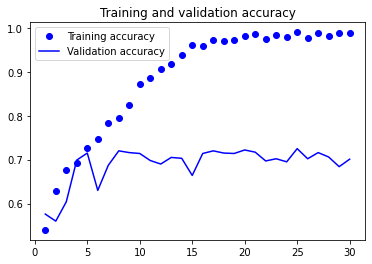

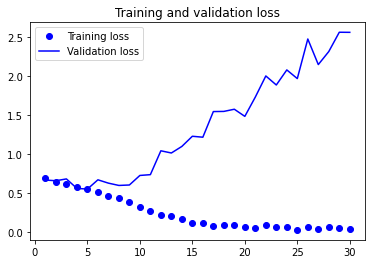

In [20]:

# Display curves of loss and accuracy during training

import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

These  plots  are  characteristic  of  overfitting.  The  training  accuracy  increases  linearly over time, until it reaches nearly 100%, whereas the validation accuracy peaks at 75%. The validation loss reaches its minimum after only ten epochs and then stalls, whereas the training loss keeps decreasing linearly as training proceeds.

Let’s check the test accuracy. Reload the model from its saved file to evaluate it as it was before it started overfitting.

In [21]:
## Evaluating the model on the test set
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 36ms/step - loss: 0.5797 - accuracy: 0.6810
Test accuracy: 0.681


We get a test accuracy of 66.9%. (Due to the randomness of neural network initializations, you may get slightly different values from this)

# Using data augmentation

Because  we  have  relatively  few  training  samples  (2,000),  overfitting  will  be  our number one concern. We’re now going to work with a technique that can help mitigate overfitting, specific to computer vision, and used almost universally when processing images with deep learning models: `data augmentation`. 

 Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

 In  Keras,  this  can  be  done  by  adding  a  number  of  *data  augmentation*  layers  at  the start of your model. Let’s get started with an example: the following Sequential model chains  several random  image  transformations.  In  our  model,  we would  include  it  right before the Rescaling layer.

In [22]:
# Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
     ])

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* RandomFlip("horizontal") — Applies horizontal flipping to a random 50% of the images that go through it.
* RandomRotation(0.1) — Rotates the input images by a random value in the range[–10%, +10%] (these are fractions of a full circle—in degrees, the range wouldbe [–36 degrees, +36 degrees]).
* RandomZoom(0.2) — Zooms  in  or  out  of  the  image  by  a  random  factor  in  the range [-20%, +20%].

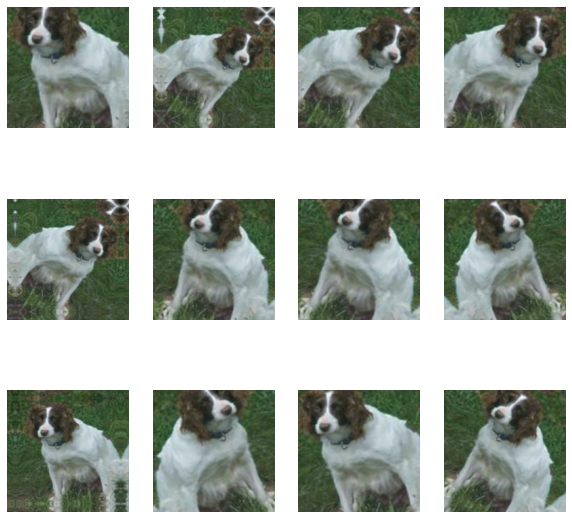

In [23]:
# Display some of the randomly augmented training images
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1):     #(1) means 1 batch
  for i in range(12):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

If  we  train  a  new  model  using  this  data-augmentation  configuration,  the  model  will never see the same input twice. But the inputs it sees are still heavily intercorrelated because  they  come  from  a  small  number  of  original  images—we  can’t  produce  newinformation; we can only remix existing information. As such, this may not be enoughto completely get rid of overfitting. To further fight overfitting, we’ll also add a Dropoutlayer to our model right before the densely connected classifier.

**One  important thing  to note  about  random  image  augmentation  layers:  just like Dropout, they’re inactive during inference (when we call predict() or evaluate()). During  evaluation,  our  model  will  behave  just  the  same  as  when  it  did  not  include data augmentation and dropout.**



In [24]:
# Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)   #normalisation
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Let’s now train our model using data augmentation and dropout. Because we expect overfitting  to  occur  much  later  during  training,  we  will  train  for  three  times  as  many epochs, i.e., one hundred.

In [25]:
# Training the regularized convnet
callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath="convnet_from_scratch_with_augmentation.keras",
            save_best_only=True,
            monitor="val_loss")
        ]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/100
63/63 [==============================] - 8s 98ms/step - loss: 0.7441 - accuracy: 0.4940 - val_loss: 0.9287 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 6s 98ms/step - loss: 0.7011 - accuracy: 0.5185 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 7s 106ms/step - loss: 0.7054 - accuracy: 0.5390 - val_loss: 0.6857 - val_accuracy: 0.5550
Epoch 4/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6946 - accuracy: 0.5835 - val_loss: 0.6486 - val_accuracy: 0.6600
Epoch 5/100
63/63 [==============================] - 8s 117ms/step - loss: 0.6948 - accuracy: 0.6435 - val_loss: 0.7936 - val_accuracy: 0.5500
Epoch 6/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6515 - accuracy: 0.6340 - val_loss: 0.5891 - val_accuracy: 0.6800
Epoch 7/100
63/63 [==============================] - 6s 96ms/step - loss: 0.6270 - accuracy: 0.6755 - val_loss: 0.6152 - val_accuracy: 0.6520
Epoc

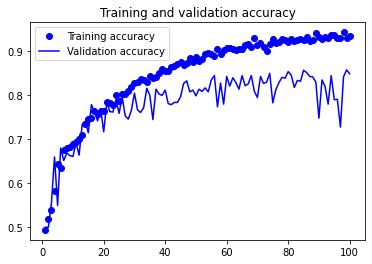

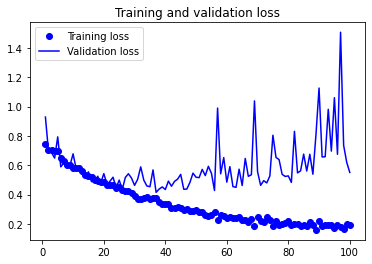

In [26]:
# Plot the results of the regularized convnet

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Thanks to data augmentation and dropout, we start overfitting much later, around epochs 60–70 (compared to epoch 10 for the original model). The validation accuracy ends up consistently in the 80–85% range — a big improvement over our first try.

In [27]:
# Evaluating the model on the test set, i.e., check the test accuracy
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 35ms/step - loss: 0.4562 - accuracy: 0.8100
Test accuracy: 0.810


We now have a test accuracy of 80.9%. 

Make sure you download the saved file (convnet_from_scratch_with_augmentation.keras). We will use it for further experimentations in the future.

In [28]:
# Download file to local drive
from google.colab import files
files.download('convnet_from_scratch_with_augmentation.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

By  further  tuning  the  model’s  configuration (such  as  the  number  of  filters  per convolution layer, or the number of layers in the model), we might be able to get an even better accuracy, likely up to 90%. But it would prove difficult to go any higher just by training our own convnet from scratch, because we have so little data to workwith. As a next step to improve our accuracy on this problem, we’ll have to use a pre-trained model, which is the focus of the next two sections.

> Indented block



# Using a pre-trained convnet 

A common and highly effective approach to deep learning on small image datasets is to use a pretrained model. A *pretrained model* is a model that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original data-set is large enough and general enough, the spatial hierarchy of features learned by the  pretrained  model  can  effectively  act  as  a  generic  model  of  the  visual  world,  and hence,  its  features  can  prove  useful  for  many  different  computer  vision  problems, even though these new problems may involve completely different classes than those of the original task. For instance, you might train a model on ImageNet (where classes are  mostly  animals  and  everyday  objects)  and  then  repurpose  this  trained  model  for something  as  remote  as  identifying  furniture  items  in  images.  Such  portability  of learned  features  across  different  problems  is  a  key  advantage  of  deep  learning  compared  to  many  older,  shallow  learning  approaches,  and  it  makes  deep  learning  very effective for small-data problems.

In  this  case,  let’s  consider  a  large  convnet  trained  on  the  ImageNet  dataset  (1.4million labeled images and 1,000 different classes). ImageNet contains many animal classes, including different species of cats and dogs, and you can thus expect it to perform well on the dogs-versus-cats classification problem.  We’ll  use  the  *VGG16*  architecture,  developed  by  Karen  Simonyan  and  Andrew Zisserman in 2014. This is an older model, far from the current state of the art and somewhat heavier than many other recent models. However, its architecture is similar to what you’re already familiar with, and it’s easy to understand without introducing  any  new  concepts.  There are other models such as VGG, ResNet, Inception, Xception, and so on; you’ll get used to  them  because  they  will  come  up  frequently  if  you  keep  doing  deep  learning  forcomputer vision.

There  are  two  ways  to  use  a  pretrained  model:  feature  extraction  and  fine-tuning. Let’s start with feature extraction.

## Feature extraction

Feature  extraction  consists  of  using  the  representations  learned  by  a  previouslytrained  model  to  extract  interesting  features  from  new  samples.  These  features  arethen run through a new classifier, which is trained from scratch.

As  you  saw  previously,  convnets  used  for  image  classification  comprise  two  parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier. The first part is called the convolutional base of the model. In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output. 

In [29]:
# let's try re-using the convolutional base of VGG16

from keras.applications import VGG16

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 5s 0us/step


We passed three arguments to the constructor:

* weights, to specify which weight checkpoint to initialize the model from
* include_top, which refers to including or not the densely-connected classifier on top of the network. By default, this densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected classifier (with only two classes, cat and dog), we don't need to include it.
* input_shape, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, then the network will be able to process inputs of any size.

Here's the detail of the architecture of the VGG16 convolutional base: it's very similar to the simple convnets that you are already familiar with.

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

The final feature map has shape `(5, 5, 512)`. That's the feature on top of which we will stick a densely-connected classifier.

At this point, there are two ways we could proceed:

*   Run the convolutional base over our dataset, record its output to a NumPy arrayon disk, and then use this data as input to a standalone, densely connected clas-sifier similar to those you saw in chapter 4 of this book. This solution is fast andcheap to run, because it only requires running the convolutional base once forevery input image, and the convolutional base is by far the most expensive partof  the  pipeline.  But  for  the  same  reason,  this  technique  won’t  allow  us  to  usedata augmentation.

*   Extend the model we have (conv_base) by adding Dense layers on top, and runthe  whole  thing  from  end  to  end  on  the  input  data.  This  will  allow  us  to  usedata augmentation, because every input image goes through the convolutionalbase every time it’s seen by the model. But for the same reason, this technique isfar more expensive than the first.

We shall cover both techniques.

In [31]:
# First Method
# Extract the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)        
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step



Importantly, predict() only expects images, not labels, but our current dataset yieldsbatches that contain both images and their labels. Moreover, the VGG16 model expectsinputs that are preprocessed with the function keras.applications.vgg16.prepro-cess_input, which scales pixel values to an appropriate range. The extracted features are currently of shape (samples, 5, 5, 512).  

In [32]:
# Check shape of extracted feature
train_features.shape

(2000, 5, 5, 512)

We shall now define our densely connected classifier (note the use of dropoutfor regularization) and train it on the data and labels that we just recorded:

In [35]:


# Define and train the densely connected classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)      
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",              
              optimizer="rmsprop",              
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(        
        filepath="feature_extraction.keras",        
        save_best_only=True,        
        monitor="val_loss")]

history = model.fit(
    train_features, train_labels,    
    epochs=20,    
    validation_data=(val_features, val_labels),    
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 13.0461 - accuracy: 0.9325 - val_loss: 5.2056 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 4.1094 - accuracy: 0.9720 - val_loss: 3.4787 - val_accuracy: 0.9790
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6559 - accuracy: 0.9865 - val_loss: 3.4546 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1943 - accuracy: 0.9885 - val_loss: 5.1270 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6139 - accuracy: 0.9940 - val_loss: 3.9539 - val_accuracy: 0.9800
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3999 - accuracy: 0.9955 - val_loss: 9.3332 - val_accuracy: 0.9620
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1667 - accuracy: 0.9985 - val_loss: 3.9525 - val_accuracy: 0.9800
Epoch 8/20
63/63 [

Training  is  very  fast  because  we  only  have  to  deal  with  two  Dense  layers — an  epoch takes less than one second even on CPU.

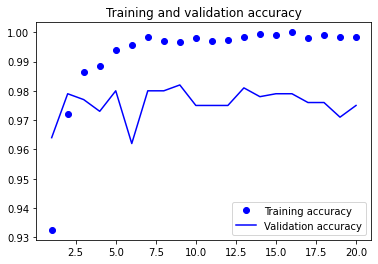

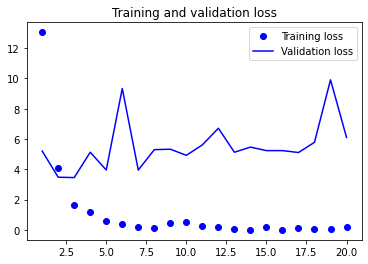

In [36]:
# Plot loss and accuracy curves during training

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We have now reached a validation accuracy of about 97% — much better than we achieved in the previous section with the small model trained from scratch.  We can see here that the  plots  show  that  we’re  overfitting  almost  from  the  start, despite  using  dropout  with  a  fairly  large  rate.  That’s  because  this  technique  doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets. 

## Feature Extraction with Data Augmentation

Now  let’s  review  the  second  technique  mentioned  earlier for  doing  feature  extraction, which is much slower and more expensive, but which allows us to use data augmentation  during  training:  creating  a  model  that  chains  the  conv_base  with  a  new  dense classifier, and training it end to end on the inputs.

First, we freeze the convolutional base. Freezing a layer or set of layers prevents their weights from being updated during training so that the representations previously learned by the convolutional base will not be modified during training. 

In Keras, we freeze a layer or model by setting its trainable attribute to False.

In [37]:
# Method 2
# Feature extraction with data augmentation
# Instantiating and freezing the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",    
    include_top=False)
conv_base.trainable = False

Setting trainable to False empties the list of trainable weights of the layer or model.

In [38]:
# Print the list of trainable weights before and after freezing

conv_base.trainable = True
print("This is the number of trainable weights"
 "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights"
"after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weightsbefore freezing the conv base: 26
This is the number of trainable weightsafter freezing the conv base: 0


Let's now create a new model that chains together:

23

1.   A data augmentation stage
2.   Our frozen convolutional base
3.   A dense classifier

In [40]:
# Add a data augmentation stage and a classifier to the convolutional base

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"),        
     layers.RandomRotation(0.1),        
     layers.RandomZoom(0.2)])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)          
x = keras.applications.vgg16.preprocess_input(x)   
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",              
              optimizer="rmsprop",              
              metrics=["accuracy"])

With  this  setup,  only  the  weights  from  the  two  Dense  layers  that  we  added  will  be trained.  That’s  a  total  of  four  weight  tensors:  two  per  layer  (the  main  weight  matrix and the bias vector). Note that in order for these changes to take effect, you must first compile  the  model.  If  you  ever  modify  weight  trainability  after  compilation,  you should then recompile the model, or these changes will be ignored. 

Let’s train our model using 50 epochs. Thanks to data augmentation, it will take much longer for the model to start overfitting.

**NOTE:** **This technique is so expensive that you should only attempt it if you  have  access  to  a  GPU  (such  as  the  free  GPU  available  in  Colab)—it’s intractable  on  CPU.  If  you  can’t  run  your  code  on  GPU,  then  the  previous technique is the way to go.**

In [41]:
# Training the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",        
        save_best_only=True,        
        monitor="val_loss")
    ]
history = model.fit(
    train_dataset,    
    epochs=50,    
    validation_data=validation_dataset,    
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 15s 211ms/step - loss: 23.0889 - accuracy: 0.8910 - val_loss: 5.1351 - val_accuracy: 0.9650
Epoch 2/50
63/63 [==============================] - 14s 212ms/step - loss: 6.3487 - accuracy: 0.9440 - val_loss: 3.3684 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 13s 207ms/step - loss: 5.7277 - accuracy: 0.9540 - val_loss: 4.4735 - val_accuracy: 0.9710
Epoch 4/50
63/63 [==============================] - 14s 211ms/step - loss: 5.2965 - accuracy: 0.9595 - val_loss: 3.6514 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 14s 214ms/step - loss: 3.7325 - accuracy: 0.9575 - val_loss: 7.5100 - val_accuracy: 0.9630
Epoch 6/50
63/63 [==============================] - 14s 212ms/step - loss: 3.1457 - accuracy: 0.9715 - val_loss: 3.7986 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 13s 207ms/step - loss: 4.5711 - accuracy: 0.9655 - val_loss: 3.8428 - val_accuracy: 0.979

By plotting  the  results  again, we can see that we obtained a  validation accuracy of over 98%. This is a strong improvement over the previous model.

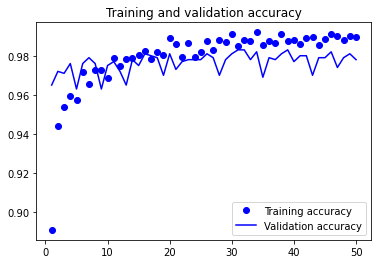

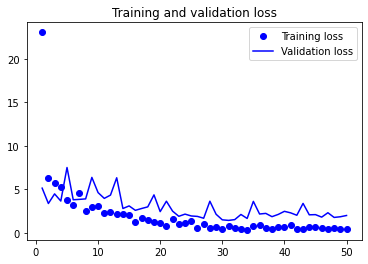

In [42]:
# Plot the results

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Let’s check the test accuracy.

In [43]:
# Evaluating the model on the test set
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 118ms/step - loss: 1.8434 - accuracy: 0.9830
Test accuracy: 0.983


Test accuracy is 97.5% - a modest improvement compared to the previous result, which is a bit disappointing given the strong results on the validation data. A model’s accuracy always depends on the set of samples you evaluate it on! Some sample sets may be more difficult than others, and strong results on one set won’t necessarily fully translate to all other sets. 

# Fine-tuning a pretrained model

Another  widely  used  technique  for  model  reuse,complementary  to  feature  extraction,  is  fine-tuning. Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly  added  part  of  the  model  (in  this  case,  the fully connected classifier) and these top layers. This is  called  fine-tuning  because  it  slightly  adjusts  the more  abstract  representations  of  the  model  being reused in order to make them more relevant for the problem at hand.

The steps for fine-tuning a network are as follows:

1.   Add the custom   network   on   top   of   analready-trained base network.
2.   Freeze the base network.
3.   Train the part we added.
4.   Unfreeze  some  layers  in  the  base  network.
(Note  that  you  should  not  unfreeze  “batchnormalization” layers, which are not relevanthere since there are no such layers in VGG16.Batch  normalization  and  its  impact  on  fine-tuning is explained in the next chapter.) 
5.   Jointly train both these layers and the part weadded.

We already  completed  the  first  three  steps  when doing  feature  extraction.  We shall now proceed  with  step  4 by unfreezing  our  conv_base  and  then  freezing the individual layers inside it.

In [44]:
# Print summary of convolutional base as reminder
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

We’ll fine-tune the last three convolutional layers, which means all layers up to block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and block5_conv3 should be trainable.

In [45]:
# Freezing all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:    
  layer.trainable = False

Now  we  can  begin  fine-tuning  the  model.  We’ll  do  this  with  the  RMSprop  optimizer, using a very low learning rate. The reason for using a low learning rate is that we want to limit  the  magnitude  of  the  modifications  we  make  to  the  representations  of  the  three layers we’re fine-tuning. Updates that are too large may harm these representations.

In [46]:
# Fine-tuning the model

model.compile(loss="binary_crossentropy",              
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),              
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",        
        save_best_only=True,        
        monitor="val_loss")
    ]

history = model.fit(
    train_dataset,    
    epochs=30,    
    validation_data=validation_dataset,    
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 17s 244ms/step - loss: 0.6125 - accuracy: 0.9905 - val_loss: 1.7037 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 15s 233ms/step - loss: 0.3235 - accuracy: 0.9910 - val_loss: 1.8876 - val_accuracy: 0.9760
Epoch 3/30
63/63 [==============================] - 15s 243ms/step - loss: 0.3482 - accuracy: 0.9915 - val_loss: 1.6547 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 15s 229ms/step - loss: 0.3387 - accuracy: 0.9895 - val_loss: 1.7475 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 15s 232ms/step - loss: 0.3527 - accuracy: 0.9920 - val_loss: 1.8075 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 15s 235ms/step - loss: 0.2287 - accuracy: 0.9930 - val_loss: 1.8995 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 15s 230ms/step - loss: 0.3684 - accuracy: 0.9910 - val_loss: 1.9401 - val_accuracy: 0.9820

We can finally evaluate this model on the test data:

In [47]:
# Model evaluation
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 115ms/step - loss: 1.6699 - accuracy: 0.9780
Test accuracy: 0.978


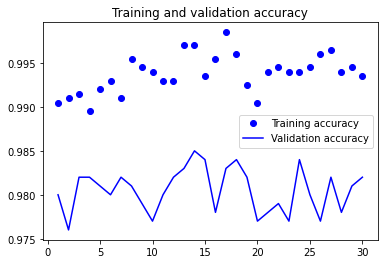

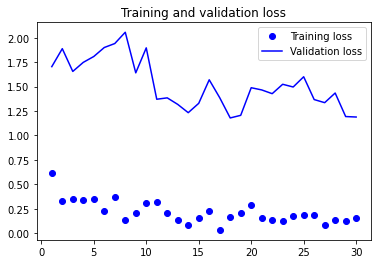

In [48]:
# Plot the results

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Now you have a solid set of tools for dealing with image-classification problems — in particular, with small datasets. 